In [1]:
import os

%load_ext autoreload
%autoreload 2

"""
To focus on decode moment for psycho (SP).
"""

'\nTo focus on decode moment for psycho (SP).\n'

# Load a dataset

In [2]:
from neuralmonkey.classes.population_mult import extract_single_pa
from pythonlib.tools.plottools import savefig
import os



In [3]:

from pythonlib.dataset.scripts.analy_manuscript_figures_FINAL import SAVEDIR_ALL
import os
from pythonlib.dataset.scripts.analy_manuscript_figures_FINAL import fig5_load_data

LIST_EXPTS = [("Diego", 240517), ("Diego", 240521), ("Diego", 240523), ("Diego", 240730), 
            ("Pancho", 240516), ("Pancho", 240521), ("Pancho", 240524)]

### Fig 5: Extract and pre-save all data
SAVEDIR_THIS = f"{SAVEDIR_ALL}/fig5"
os.makedirs(SAVEDIR_THIS, exist_ok=True)



In [4]:
### Fig. 5b: State space trajectory
SAVEDIR_THIS = f"{SAVEDIR_ALL}/fig5b"
os.makedirs(SAVEDIR_THIS, exist_ok=True)
animal = "Pancho"
date = 240524

_, map_morphset_to_dfallpa, map_tcmorphset_to_idxmorph, list_morphset, map_tcmorphset_to_info = fig5_load_data(animal, date)


Running ..  M1
Running ..  PMv
Running ..  PMd
Running ..  dlPFC
Running ..  vlPFC
Running ..  FP
Running ..  SMA
Running ..  preSMA
Running ..  M1
Running ..  PMv
Running ..  PMd
Running ..  dlPFC
Running ..  vlPFC
Running ..  FP
Running ..  SMA
Running ..  preSMA


In [5]:
# This dataset holds only trials for this morphset, where morphset is a set of images morphing
# from one extreme (learned prim) to another extreme (another learned prim).

# A given day has multiple morphsets, each indexed by an integer
for ms, dfallpa in map_morphset_to_dfallpa.items():
    print("A morphset index on this day: ", ms)

# Otherwise, use dfallpa as usual


A morphset index on this day:  1
A morphset index on this day:  8


In [15]:
_, map_morphset_to_dfallpa, map_tcmorphset_to_idxmorph, list_morphset, map_tcmorphset_to_info = fig5_load_data(animal, date)

bregion = "PMv"

for morphset in list_morphset:

    DFallpa = map_morphset_to_dfallpa[morphset]

    PA = extract_single_pa(DFallpa, bregion, None, "trial")


Running ..  M1
Running ..  PMv
Running ..  PMd
Running ..  dlPFC
Running ..  vlPFC
Running ..  FP
Running ..  SMA
Running ..  preSMA
Running ..  M1
Running ..  PMv
Running ..  PMd
Running ..  dlPFC
Running ..  vlPFC
Running ..  FP
Running ..  SMA
Running ..  preSMA


In [16]:
# Apply moment by moment decode
map_tcmorphset_to_info

{('240524-1-148', 0): ('base1', '0|0', '0|99'),
 ('240524-1-288', 0): ('base1', '0|0', '0|99'),
 ('240524-1-318', 0): ('base1', '0|0', '0|99'),
 ('240524-1-329', 0): ('base1', '0|0', '0|99'),
 ('240524-1-382', 0): ('base1', '0|0', '0|99'),
 ('240524-1-398', 0): ('base1', '0|0', '0|99'),
 ('240524-1-401', 0): ('base1', '0|0', '0|99'),
 ('240524-1-445', 0): ('base1', '0|0', '0|99'),
 ('240524-1-454', 0): ('base1', '0|0', '0|99'),
 ('240524-1-560', 0): ('base1', '0|0', '0|99'),
 ('240524-1-562', 0): ('base1', '0|0', '0|99'),
 ('240524-1-612', 0): ('base1', '0|0', '0|99'),
 ('240524-1-629', 0): ('base1', '0|0', '0|99'),
 ('240524-1-719', 0): ('base1', '0|0', '0|99'),
 ('240524-1-732', 0): ('base1', '0|0', '0|99'),
 ('240524-1-800', 0): ('base1', '0|0', '0|99'),
 ('240524-1-835', 0): ('base1', '0|0', '0|99'),
 ('240524-1-888', 0): ('base1', '0|0', '0|99'),
 ('240524-1-893', 0): ('base1', '0|0', '0|99'),
 ('240524-1-994', 0): ('base1', '0|0', '0|99'),
 ('240524-1-1015', 0): ('base1', '0|0', 

In [17]:
from neuralmonkey.analyses.decode_moment import train_decoder_helper, pipeline_train_test_scalar_score, pipeline_train_test_scalar_score_mult_train_dataset, test_decoder_helper, train_decoder_helper_extract_train_dataset
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import get_dataset_params
import os

In [18]:
dflab = PA.Xlabels["trials"]
dflab["morph"]

KeyError: 'morph'

In [12]:
bregion = "PMv"

In [13]:
SAVEDIR = "/tmp/psycho_decode"
os.makedirs(SAVEDIR, exist_ok=True)

In [33]:
# Pipeline to train and test
include_null_data = True
n_min_per_var = 5

# Train params
# Train just on endpoints
event_train = "03_samp"
twind_train = (0.05, 0.9)
filterdict_train = {"idxmorph_assigned":["0|base1", "99|base2"]}
which_level_train = "trial"
var_train = "idxmorph_assigned" # The trained variable

# Test params
event_test = "03_samp"
filterdict_test = None
list_twind_test = [(0.6, 1.0)]
which_level_test = "trial"
var_test = "idxmorph_assigned"

# Subtrract baseline? from decoding score?
subtract_baseline=False
subtract_baseline_twind=None
# subtract_baseline_twind=(-0.45, -0.05)

# Helper to extract params
# event_train, twind_train, filterdict_train, _, which_level_train = get_dataset_params(train_dataset)
# event_test, _, filterdict_test, list_twind_test, which_level_test = get_dataset_params(test_dataset)

# Other general params
do_upsample_balance=True # Upsample data to fix imbalance?
PLOT = True
prune_labels_exist_in_train_and_test = False #
savedir = f"{SAVEDIR}/decoder_training-upsample={do_upsample_balance}/{bregion}"
os.makedirs(savedir, exist_ok=True)
print(savedir)

dfscores, Dc, PAtrain, PAtest = pipeline_train_test_scalar_score(DFallpa, bregion, 
                                     var_train, event_train, twind_train, filterdict_train,
                                     var_test, event_test, list_twind_test, filterdict_test,
                                     savedir, include_null_data=include_null_data,
                                     prune_labels_exist_in_train_and_test=prune_labels_exist_in_train_and_test, PLOT=PLOT,
                                     which_level_train=which_level_train, which_level_test=which_level_test, 
                                     n_min_per_var=n_min_per_var,
                                     subtract_baseline=subtract_baseline, subtract_baseline_twind=subtract_baseline_twind,
                                     do_upsample_balance=do_upsample_balance, allow_multiple_twind_test=True,
                                     classifier_version="logistic")


/tmp/psycho_decode/decoder_training-upsample=True/PMv
pa.slice_by_labels_filtdict, using var=idxmorph_assigned, n before filt: (14, 129, 280)
pa.slice_by_labels_filtdict, using var=idxmorph_assigned, n after filt: (14, 58, 280)
Keeping n trials / total:  58 / 58
do_train_splits==False -- downsample_trials==False
Training this classifier version:  logistic
Upsampling dataset...
... starting distribution:  {'null': 348, '99|base2': 210, '0|base1': 196} (754, 14)
[Doing upsample] Across levels, nmin_dat / nmax_dat: 196 348
... ending distribution:  {'null': 348, '99|base2': 348, '0|base1': 348} (1044, 14)
Classes, in order:  ['0|base1' '99|base2' 'null']
Saving plots at ...  /tmp/psycho_decode/decoder_training-upsample=True/PMv/train_set


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/

Saving plots at ...  /tmp/psycho_decode/decoder_training-upsample=True/PMv/test-var_score=score


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/

Saving plots at ...  /tmp/psycho_decode/decoder_training-upsample=True/PMv/test-var_score=score_norm_minmax


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/code/pythonlib/pythonlib/tools/snstools.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list_text,rotation=rotation, horizontalalignment="right")
/

In [34]:
# These are the trial indices, into PAtest.Xlabels["trials"]
dfscores["pa_idx"]

0        0
1        0
2        0
3        1
4        1
      ... 
382    127
383    127
384    128
385    128
386    128
Name: pa_idx, Length: 387, dtype: int64

In [35]:
# These are the decoder classes (as strings)
dfscores["decoder_class"]

0       0|base1
1      99|base2
2          null
3       0|base1
4      99|base2
         ...   
382    99|base2
383        null
384     0|base1
385    99|base2
386        null
Name: decoder_class, Length: 387, dtype: object

In [36]:
# These are the decoder classes (as indices)
dfscores["decoder_idx"]


0      0
1      1
2      2
3      0
4      1
      ..
382    1
383    2
384    0
385    1
386    2
Name: decoder_idx, Length: 387, dtype: int64

In [37]:
# You can map between indices and class using this...
Dc.MapIdxToLabel

{0: '0|base1', 1: '99|base2', 2: 'null'}

### Plot timecourse of decoding accuracy

PLOTTING... (nstrokes, ntrials, ntimes)  (3, 28, 129)
PLOTTING... (nstrokes, ntrials, ntimes)  (3, 14, 129)
PLOTTING... (nstrokes, ntrials, ntimes)  (3, 13, 129)
PLOTTING... (nstrokes, ntrials, ntimes)  (3, 16, 129)
PLOTTING... (nstrokes, ntrials, ntimes)  (3, 9, 129)
PLOTTING... (nstrokes, ntrials, ntimes)  (3, 5, 129)
PLOTTING... (nstrokes, ntrials, ntimes)  (3, 14, 129)
PLOTTING... (nstrokes, ntrials, ntimes)  (3, 30, 129)


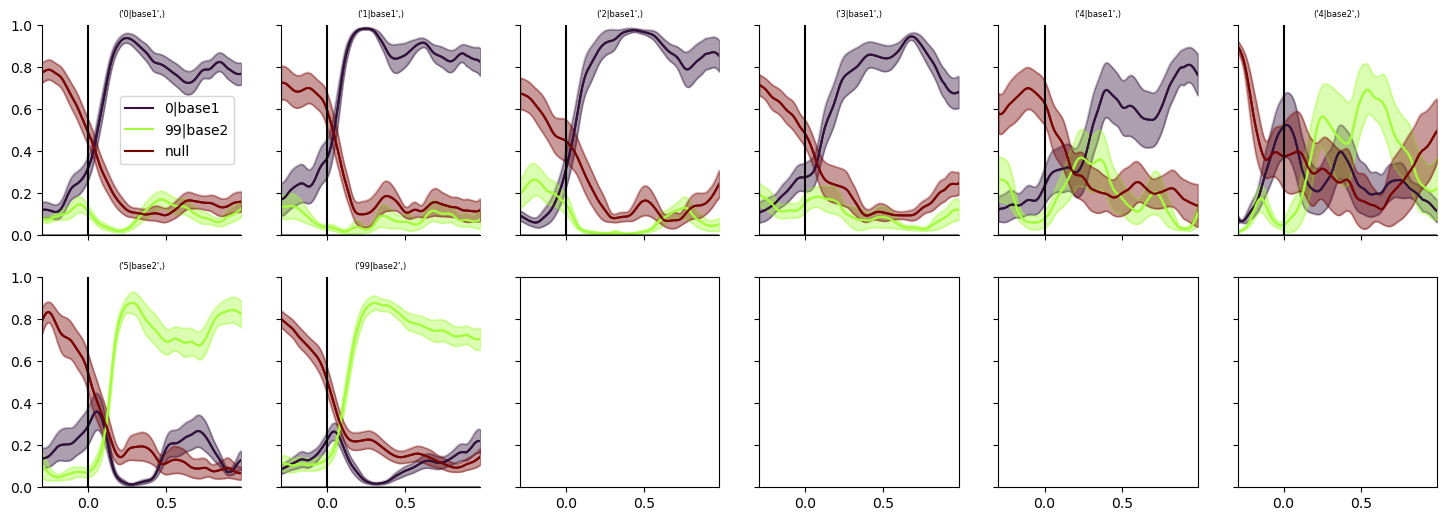

In [45]:
# Plot mean decoder accuracy, split by trial condition (vars_columns)

twind_test = (-0.4, 1.0)
vars_columns = ["idxmorph_assigned"]
labels_in_order_keep = Dc.LabelsDecoderGood
labels_in_order_keep = Dc.LabelsUnique
fig = Dc.timeseries_plot_flex_split_columns(PAtest, vars_columns, twind_test, labels_in_order_keep)

# savefig(fig, f"{SAVEDIR}/timecourses-final-{early_late_this}.pdf")
# plt.close("all")

### Plot example single trials

In [ ]:
#TODO: Look for evidence, on invidiual trials, for switching representatiosn between two decoded states, for the ambiguous images

In [46]:
from pythonlib.tools.pandastools import grouping_print_n_samples

# These are the useful fields related to trial category, and this also shows how they are related.
grouping_print_n_samples(dflab, ["idx_morph_temp", "assigned_label", "assigned_base_simple", "idxmorph_assigned"])

# "assigned_label" tells you if a idx_morph_temp is "ambiguous"
dflab["assigned_label"].value_counts()


(0, 'base', 'base1', '0|base1') :     28
(1, 'not_ambig', 'base1', '1|base1') :     14
(2, 'not_ambig', 'base1', '2|base1') :     13
(3, 'not_ambig', 'base1', '3|base1') :     16
(4, 'ambig', 'base1', '4|base1') :     9
(4, 'ambig', 'base2', '4|base2') :     5
(5, 'not_ambig', 'base2', '5|base2') :     14
(99, 'base', 'base2', '99|base2') :     30


assigned_label
base         58
not_ambig    57
ambig        14
Name: count, dtype: int64

For this trial 30, idxmorph_assigned = 0|base1


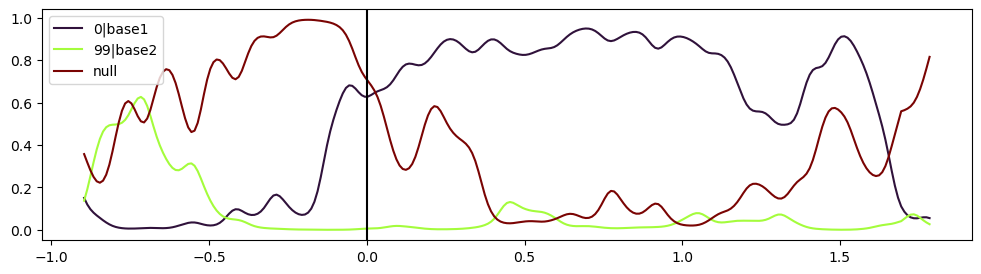

In [47]:
# Plot an example training trial
indtrial = 30
dflab = PAtrain.Xlabels['trials']
print(f"For this trial {indtrial}, {Dc.VarDecode} = {dflab.iloc[indtrial][Dc.VarDecode]}")
Dc.plot_single_trial(indtrial, PA=PAtrain);


For this trial 10, idxmorph_assigned = 0|base1


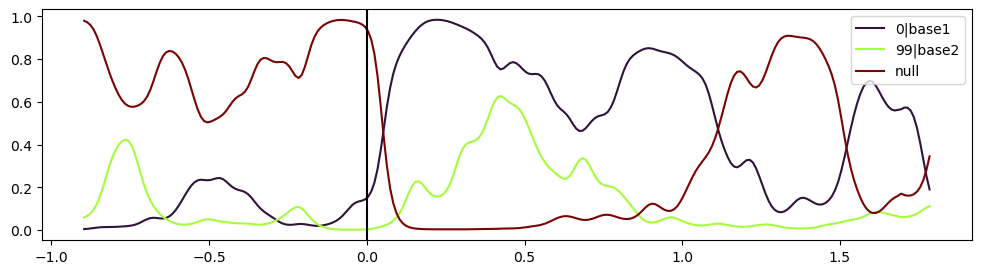

In [48]:
# Plot an example test trial
indtrial = 10
dflab = PAtest.Xlabels['trials']
print(f"For this trial {indtrial}, {Dc.VarDecode} = {dflab.iloc[indtrial][Dc.VarDecode]}")
Dc.plot_single_trial(indtrial, PA=PAtest);


In [49]:
# Plot an example test trial using trialcode
trialcode = "240625-2-130"

dflab = PAtest.Xlabels['trials']
indtrial = dflab[dflab["trialcode"] == trialcode].index.tolist()[0]

print(f"For this trial {indtrial}, {Dc.VarDecode} = {dflab.iloc[indtrial][Dc.VarDecode]}")
print(f"For this trial {indtrial}, shapes_drawn = {dflab.iloc[indtrial]['shapes_drawn']}")
print(f"For this trial {indtrial}, taskconfig_shp = {dflab.iloc[indtrial]['taskconfig_shp']}")
Dc.plot_single_trial(indtrial, PA=PAtest);


IndexError: list index out of range

### Helper to get decoder time series in a PA format

In [53]:
twind = (-0.6, 1.0)
PAprobs, probs_mat_all, times, labels = Dc.timeseries_score_wrapper(PAtest, twind)

In [57]:
from neuralmonkey.neuralplots.population import heatmapwrapper_many_useful_plots
# idx_morph_temp", "assigned_label", "assigned_base_simple

heatmapwrapper_many_useful_plots(PAprobs, "/tmp", "assigned_base_simple", "idx_morph_temp", n_rand_trials=20)

--- Saving at:  /tmp
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n before filt: (3, 129, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n after filt: (3, 28, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n before filt: (3, 129, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n after filt: (3, 14, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n before filt: (3, 129, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n after filt: (3, 13, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n before filt: (3, 129, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n after filt: (3, 16, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n before filt: (3, 129, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n after filt: (3, 14, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n before filt: (3, 129, 149)
pa.slice_by_labels_filtdict, using var=idx_morph_temp, n after fi